Route Finder Using Bi-Directional BFS/DFS <br>

Objective: Use Bi-directional BFS/DFS to solve a navigation problem.<br>

Problem Statement: Represent a city map as a graph where intersections are nodes and roads are edges. Find the shortest path between two locations.
<br>
Tasks:<br>
Implement Bi-directional BFS to minimize the number of nodes explored.<br>
Compare the performance of Bi-directional BFS with standard BFS and DFS.<br>
Visualize the search process (e.g., using a library like networkx in Python).<br>

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

City Map:


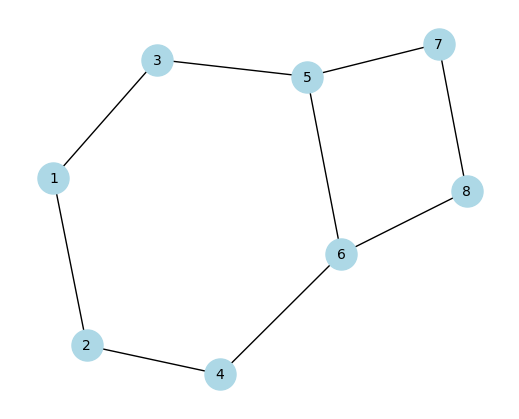

Finding shortest path from 1 to 8 using Bi-directional BFS...
Shortest Path: [1, 2, 4, 6, 8]


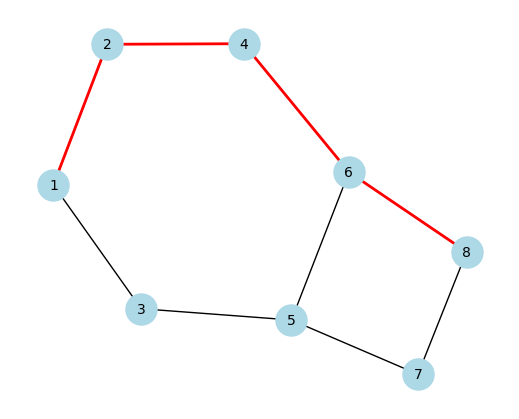

In [18]:
def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start]

    front_start = {start}
    front_goal = {goal}
    visited_start = {start: None}
    visited_goal = {goal: None}

    while front_start and front_goal:
        next_front_start = set()
        for node in front_start:
            for neighbor in graph.neighbors(node):
                if neighbor not in visited_start:
                    visited_start[neighbor] = node
                    next_front_start.add(neighbor)
                    if neighbor in visited_goal:
                        return reconstruct_path(visited_start, visited_goal, neighbor)

        front_start = next_front_start

        next_front_goal = set()
        for node in front_goal:
            for neighbor in graph.neighbors(node):
                if neighbor not in visited_goal:
                    visited_goal[neighbor] = node
                    next_front_goal.add(neighbor)
                    if neighbor in visited_start:
                        return reconstruct_path(visited_start, visited_goal, neighbor)

        front_goal = next_front_goal

    return None

def reconstruct_path(visited_start, visited_goal, meeting_point):
    path = []
    current = meeting_point
    while current is not None:
        path.append(current)
        current = visited_start[current]
    path.reverse()

    current = visited_goal[meeting_point]
    while current is not None:
        path.append(current)
        current = visited_goal[current]

    return path

def visualize_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(5, 4))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)
    plt.show()

if __name__ == "__main__":
    G = nx.Graph()
    edges = [
        (1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6), (5, 7), (6, 8), (7, 8)
    ]
    G.add_edges_from(edges)

    print("City Map:")
    visualize_graph(G)

    start, goal = 1, 8
    print(f"Finding shortest path from {start} to {goal} using Bi-directional BFS...")
    path = bidirectional_bfs(G, start, goal)
    print("Shortest Path:", path)

    if path:
        visualize_graph(G, path)